<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Download-das-bibliotecas" data-toc-modified-id="Download-das-bibliotecas-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Download das bibliotecas</a></span></li><li><span><a href="#Construção-do-Modelo" data-toc-modified-id="Construção-do-Modelo-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Construção do Modelo</a></span></li><li><span><a href="#Otimização-dos-Parâmetros" data-toc-modified-id="Otimização-dos-Parâmetros-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Otimização dos Parâmetros</a></span></li><li><span><a href="#Quantificação-de-Incertezas" data-toc-modified-id="Quantificação-de-Incertezas-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Quantificação de Incertezas</a></span></li></ul></div>

## Download das bibliotecas

In [1]:
using Pkg
Pkg.activate("..")
Pkg.status()

Activating environment at `D:\modelo-covid19\Project.toml`
    Status `D:\modelo-covid19\Project.toml`
  [864edb3b] DataStructures v0.17.15
  [aae7a2af] DiffEqFlux v1.9.0
  [1130ab10] DiffEqParamEstim v1.14.0
  [41bf760c] DiffEqSensitivity v6.13.0
  [ef61062a] DiffEqUncertainty v1.4.1
  [0c46a032] DifferentialEquations v6.13.0
  [31c24e10] Distributions v0.21.12
  [587475ba] Flux v0.10.4
  [1b10255b] GlobalSensitivityAnalysis v0.0.10
  [429524aa] Optim v0.20.6
  [1dea7af3] OrdinaryDiffEq v5.35.5
  [65888b18] ParameterizedFunctions v5.3.0
  [438e738f] PyCall v1.91.4
  [d330b81b] PyPlot v2.9.0
  [8a4e6c94] QuasiMonteCarlo v0.2.0
  [e88e6eb3] Zygote v0.4.19


In [2]:
ENV["PYTHON"] = "/home/rafael/anaconda3/bin/python"

"/home/rafael/anaconda3/bin/python"

In [3]:
include("../src/dados.jl");

In [4]:
include("../src/models.jl");

In [152]:
include("../src/graphs.jl");

In [78]:
include("../src/parametrization.jl");

In [7]:
include("../src/optimization.jl");

## Construção do Modelo

In [93]:
Ts = 0.0:1.0:float(n_pts)
sol = model(params_rio_base, CI_Rio, Ts);

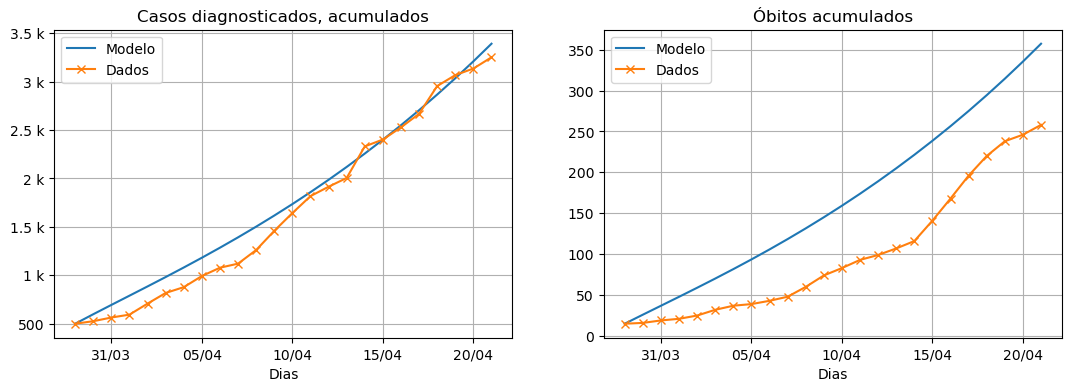

In [94]:
fig, axs = PyPlot.subplots(ncols=2, figsize=(13,4))
datas = [Rio_acc_d,Rio_acc_m]
series = [sol[9,:],sol[10,:]]
axs[1].set_title("Casos diagnosticados, acumulados")
axs[2].set_title("Óbitos acumulados")
for (ax,serie,data) in zip(axs,series,datas)
    graph_py.plot_accum(serie, data,real_data = true, ax = ax,blur = 1.0, cor_serie = "C0", cor_dados = "C1x-")
end

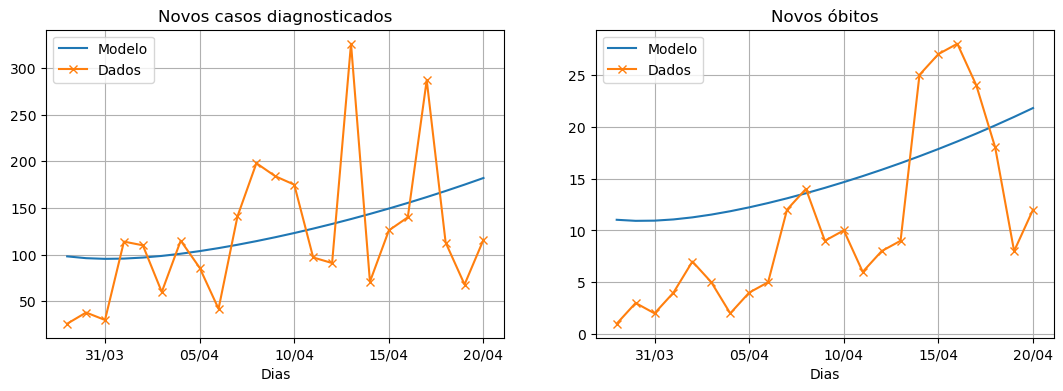

In [100]:
fig, axs = PyPlot.subplots(ncols=2, figsize=(13,4))
datas = [diagn_Rio,obitos_Rio]
series = [sol[9,:],sol[10,:]]
axs[1].set_title("Novos casos diagnosticados")
axs[2].set_title("Novos óbitos")
for (ax,serie,data) in zip(axs,series,datas)
    graph_py.plot_daily(serie, data,real_data = true, ax = ax, cor_serie = "C0", cor_dados = "C1x-")
end

## Otimização dos Parâmetros

In [11]:
pp_p_ci(p_start)

População em quarentena = 4.0313418e6 = 60.0 %
          Exposta       = 3486.0
          Assintom      = 75.36444498598763
          Sintomática   = 1180.709638113805
    
Taxa de contágio    = 2.2552352348167335
Fator cont assintom = 0.1
Em quarentena       = 60.0 % 
Prop sintomática    = 0.94
Taxa testagem A     = 0.01 ~ 100.0 dias
Taxa testagem I     = 0.03333333333333333 ~ 30.0 dias


In [12]:
loss_obj(p_start)

373081.2634298075

In [13]:
res = DiffEqFlux.sciml_train(loss_adjoint, p_start, Fminbox(LBFGS()),
    lower_bounds=[0.0, 0.01, 0.4, 0.92, 0, 0.2, 2], upper_bounds=[1e-6, 0.2, 0.7, 0.94, 0.4, 0.6, 50])
    #cb = cb)

┌ Warning: Initial position cannot be on the boundary of the box. Moving elements to the interior.
│ Element indices affected: [4]
└ @ Optim C:\Users\rafabench\.julia\packages\Optim\UkDyx\src\multivariate\solvers\constrained\fminbox.jl:227


 * Status: success

 * Candidate solution
    Minimizer: [7.95e-08, 2.00e-01, 5.94e-01,  ...]
    Minimum:   3.303663e+05

 * Found with
    Algorithm:     Fminbox with L-BFGS
    Initial Point: [1.00e-07, 1.00e-01, 6.00e-01,  ...]

 * Convergence measures
    |x - x'|               = 0.00e+00 ≤ 0.0e+00
    |x - x'|/|x'|          = 0.00e+00 ≤ 0.0e+00
    |f(x) - f(x')|         = 0.00e+00 ≤ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 0.00e+00 ≤ 0.0e+00
    |g(x)|                 = 6.23e+03 ≰ 1.0e-08

 * Work counters
    Seconds run:   53  (vs limit Inf)
    Iterations:    8
    f(x) calls:    7748
    ∇f(x) calls:   7748


In [14]:
pp_p_ci(p_start)

População em quarentena = 4.0313418e6 = 60.0 %
          Exposta       = 3486.0
          Assintom      = 75.36444498598763
          Sintomática   = 1180.709638113805
    
Taxa de contágio    = 2.2552352348167335
Fator cont assintom = 0.1
Em quarentena       = 60.0 % 
Prop sintomática    = 0.94
Taxa testagem A     = 0.01 ~ 100.0 dias
Taxa testagem I     = 0.03333333333333333 ~ 30.0 dias


In [15]:
pp_p_ci(res.minimizer)

População em quarentena = 3.992975719536452e6 = 59.42898296844667 %
          Exposta       = 3864.555907880556
          Assintom      = 79.72904612619062
          Sintomática   = 1249.088389310316
    
Taxa de contágio    = 1.8706304055613538
Fator cont assintom = 0.1999999981746691
Em quarentena       = 59.42898296844667 % 
Prop sintomática    = 0.9399999999999998
Taxa testagem A     = 0.018481403466247062 ~ 54.10844483896036 dias
Taxa testagem I     = 0.030802339110411775 ~ 32.46506690337621 dias


In [16]:
Ts = 0.0:1.0:23
CI_opt, p_opt = build_p_ci(res.minimizer)
sol = model(p_opt, CI_opt, Ts);

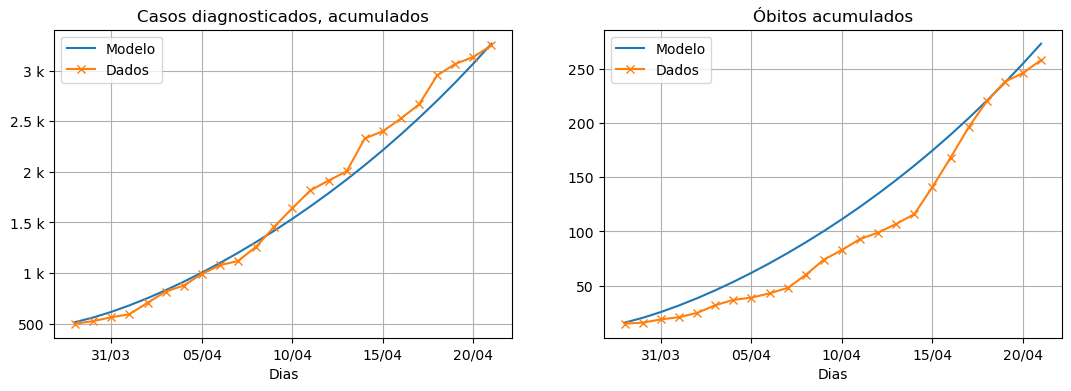

In [17]:
fig, axs = PyPlot.subplots(ncols=2, figsize=(13,4))
datas = [Rio_acc_d,Rio_acc_m]
series = [sol[9,:],sol[10,:]]
axs[1].set_title("Casos diagnosticados, acumulados")
axs[2].set_title("Óbitos acumulados")
for (ax,serie,data) in zip(axs,series,datas)
    graph_py.plot_accum(serie, data,real_data = true, ax = ax,blur = 1.0, cor_dados = "x-")
end

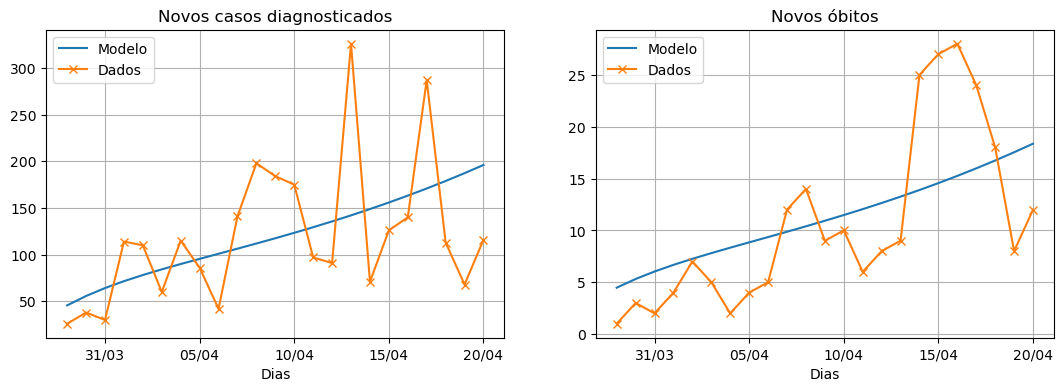

In [18]:
fig, axs = PyPlot.subplots(ncols=2, figsize=(13,4))
datas = [diagn_Rio,obitos_Rio]
series = [sol[9,:],sol[10,:]]
axs[1].set_title("Novos casos diagnosticados")
axs[2].set_title("Novos óbitos")
for (ax,serie,data) in zip(axs,series,datas)
    graph_py.plot_daily(serie, data,real_data = true, ax = ax)
end

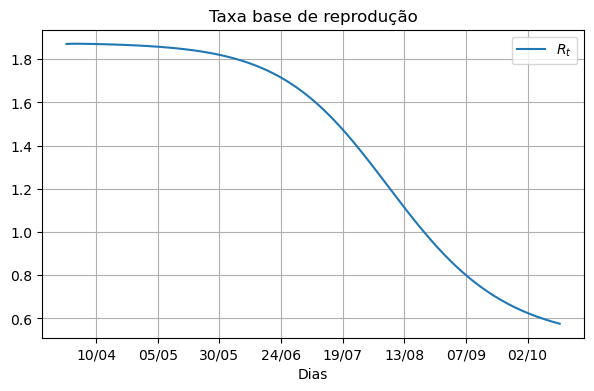

In [19]:
Ts = 0.0:1.0:200
CI_opt, p_opt = build_p_ci(res.minimizer)
sol = model(p_opt, CI_opt, Ts);
fig, ax = PyPlot.subplots(ncols=1, figsize=(7,4))
serie = Rt(sol,p_opt)
ax.set_title("Taxa base de reprodução")
graph_py.plot_accum(serie, Rio_acc_d,real_data = false, m_label = L"R_t", ax = ax,blur = 1.0, eng_fmt = false)

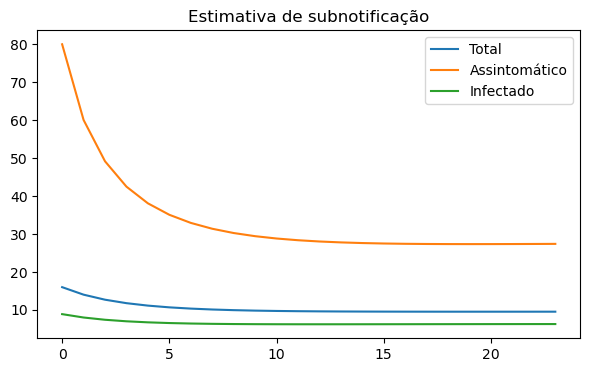

PyObject <matplotlib.legend.Legend object at 0x00000000EA423FC8>

In [122]:
fig, ax = PyPlot.subplots(ncols=1, figsize=(7,4))
series_subnot = [(sol[4,:].+sol[5,:])./(sol[6,:].+sol[7,:]),(sol[4,:])./(sol[6,:]),(sol[5,:])./(sol[7,:])]
m_labels = ["Total", "Assintomático", "Infectado"]
ax.set_title("Estimativa de subnotificação")
for (serie,label) in zip(series_subnot,m_labels)
    ax.plot(serie, label = label)
end
ax.legend()

## Quantificação de Incertezas

In [359]:
ans_min = res.minimizer

7-element Array{Float64,1}:
 7.952865847804343e-8
 0.1999999981746691  
 0.5942898296844666  
 0.9399999999999998  
 0.030802339110411775
 0.5999999999999999  
 7.760152425462963   

In [417]:
data = SobolData(
    params = OrderedDict(:x1 => Uniform(ans_min[1]*0.5, ans_min[1]*2.0),
        :x2 => Uniform(ans_min[2]*0.99, ans_min[2]*1.0),
        :x3 => Uniform(ans_min[3] - 0.20, ans_min[3] + 0.20),
        :x4 => Uniform(ans_min[4]*0.999, ans_min[4]*1.0),
        :x5 => Uniform(ans_min[5]*0.8, ans_min[5]*1.0),
        :x6 => Uniform(ans_min[6]*0.99, ans_min[6]*1.00),
        :x7 => Uniform(ans_min[7]*0.5, ans_min[7]*5.0)),
    N = 2000
);

In [418]:
samples = GlobalSensitivityAnalysis.sample(data)

32000×7 Array{Float64,2}:
 6.59762e-8  0.198193  0.601712  0.939696  0.0263685  0.599443   5.48288
 1.47058e-7  0.198193  0.601712  0.939696  0.0263685  0.599443   5.48288
 6.59762e-8  0.199002  0.601712  0.939696  0.0263685  0.599443   5.48288
 6.59762e-8  0.198193  0.422024  0.939696  0.0263685  0.599443   5.48288
 6.59762e-8  0.198193  0.601712  0.93914   0.0263685  0.599443   5.48288
 6.59762e-8  0.198193  0.601712  0.939696  0.0262121  0.599443   5.48288
 6.59762e-8  0.198193  0.601712  0.939696  0.0263685  0.594967   5.48288
 6.59762e-8  0.198193  0.601712  0.939696  0.0263685  0.599443  17.2823 
 6.59762e-8  0.199002  0.422024  0.93914   0.0262121  0.594967  17.2823 
 1.47058e-7  0.198193  0.422024  0.93914   0.0262121  0.594967  17.2823 
 1.47058e-7  0.199002  0.601712  0.93914   0.0262121  0.594967  17.2823 
 1.47058e-7  0.199002  0.422024  0.939696  0.0262121  0.594967  17.2823 
 1.47058e-7  0.199002  0.422024  0.93914   0.0263685  0.594967  17.2823 
 ⋮                       

In [419]:
@time series = prob_adjust(model, (a,b) -> 1, res -> likelihood(res, σ=1e5), param_range_uq(samples), tol = 0.1);

 25.907318 seconds (12.11 M allocations: 2.459 GiB, 1.72% gc time)


In [425]:
idxs = Random.rand(1:length(series), 1500);

In [426]:
diagn_samples = (hcat([series[j][1]["res"][9,1:24] for j in idxs]...))
death_samples = (hcat([series[j][1]["res"][10,1:24] for j in idxs]...));

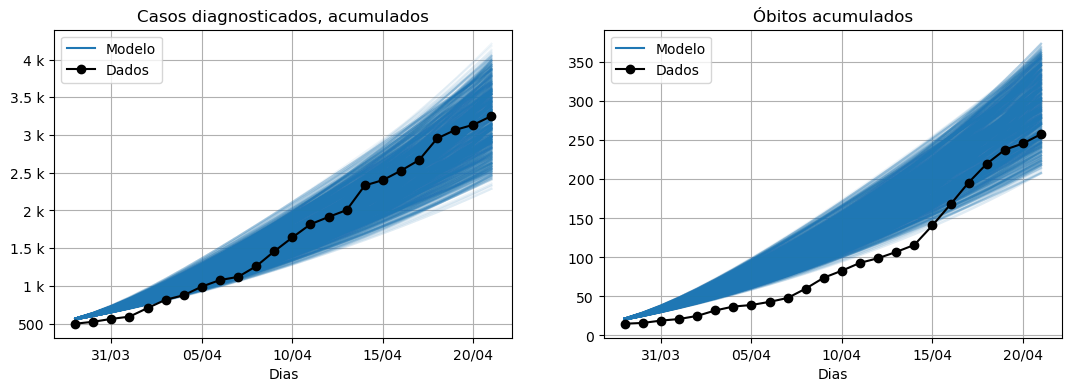

In [427]:
fig, axs = PyPlot.subplots(ncols=2, figsize=(13,4))
datas = [Rio_acc_d,Rio_acc_m]
models = [diagn_samples,death_samples]
axs[1].set_title("Casos diagnosticados, acumulados")
axs[2].set_title("Óbitos acumulados")
custom_lines = [ mlines.Line2D([], [], color="C0", label = "Modelo"),
                 mlines.Line2D([], [], color="k", marker = "o", label = "Dados")]
for (ax,data, model) in zip(axs, datas, models)
    graph_py.plot_accum(model, data, real_data = true, label = nothing, ax = ax, blur = 0.07, cor_serie = "C0", cor_dados = "ko-", legend = false)
    ax.legend(handles=custom_lines)
end

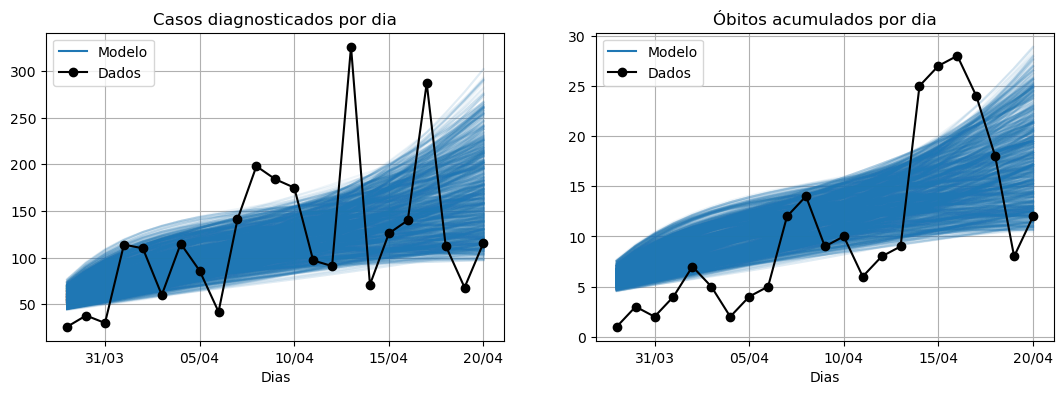

In [428]:
fig, axs = PyPlot.subplots(ncols=2, figsize=(13,4))
datas = [diagn_Rio,obitos_Rio]
models = [diagn_samples,death_samples]
axs[1].set_title("Casos diagnosticados por dia")
axs[2].set_title("Óbitos acumulados por dia")
custom_lines = [ mlines.Line2D([], [], color="C0", label = "Modelo"),
                 mlines.Line2D([], [], color="k", marker = "o", label = "Dados")]
axs[1].legend(custom_lines)
for (ax,data, model) in zip(axs, datas, models)
    graph_py.plot_daily(model, data, real_data = true, label = nothing, ax = ax, blur = 0.07, cor_serie = "C0", cor_dados = "ko-", legend = false)
    ax.legend(handles=custom_lines)
end

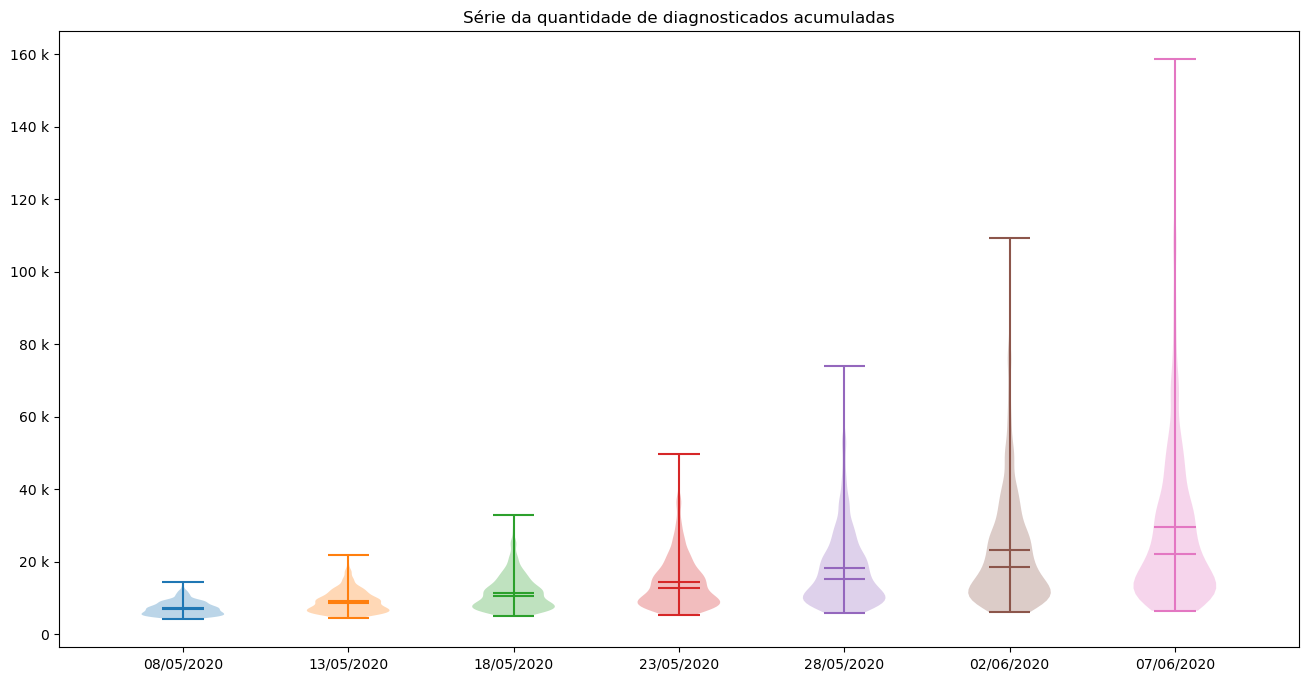

In [429]:
ts = 40:5:70
xs, ws = build_series(series, idxs, ts, index = 9);
fig, ax = plt.subplots(figsize=(16,8))
ax.set_title("Série da quantidade de diagnosticados acumuladas")
graph_py.graph_series(xs,ws,ts,ax)

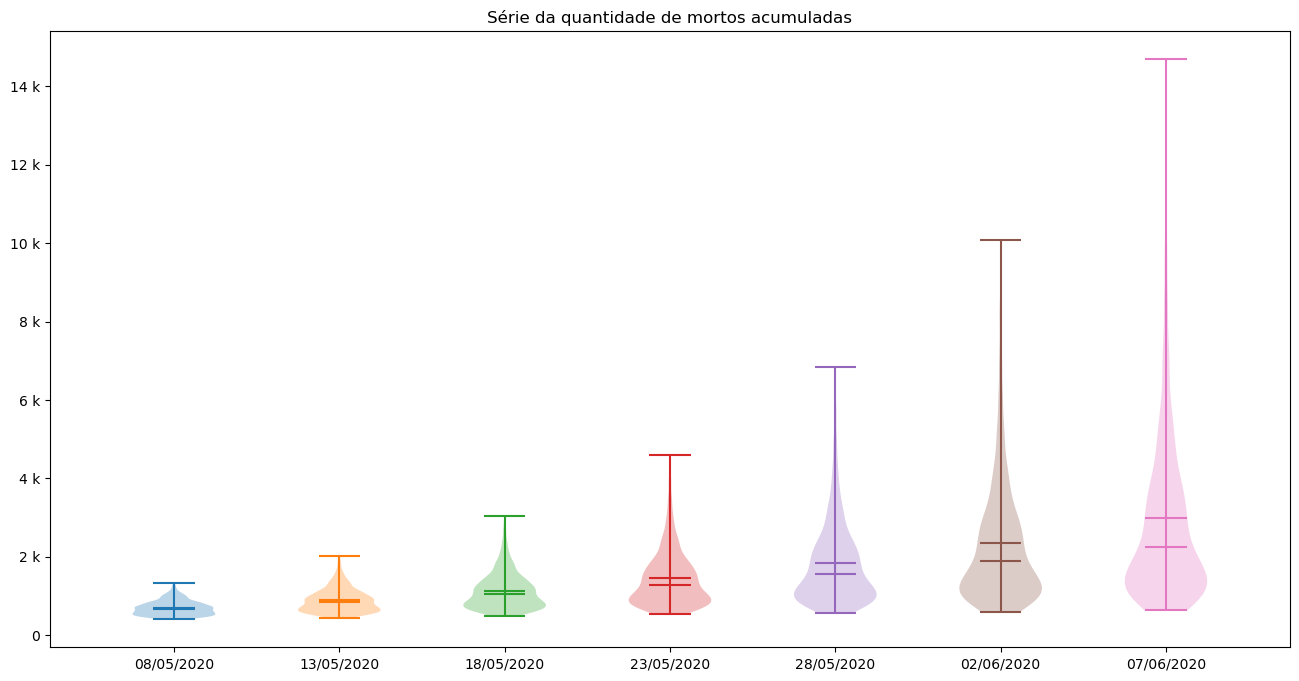

In [430]:
ts = 40:5:70
xs, ws = build_series(series, idxs, ts);
fig, ax = plt.subplots(figsize=(16,8))
ax.set_title("Série da quantidade de mortos acumuladas")
graph_py.graph_series(xs,ws,ts,ax)

In [431]:
ts = 40:5:70
xs = [[Rt(series[j][1]["res"],p_opt)[t] for j in idxs] for t in ts]
ws = [[series[j][2] for j in idxs] for t in ts];

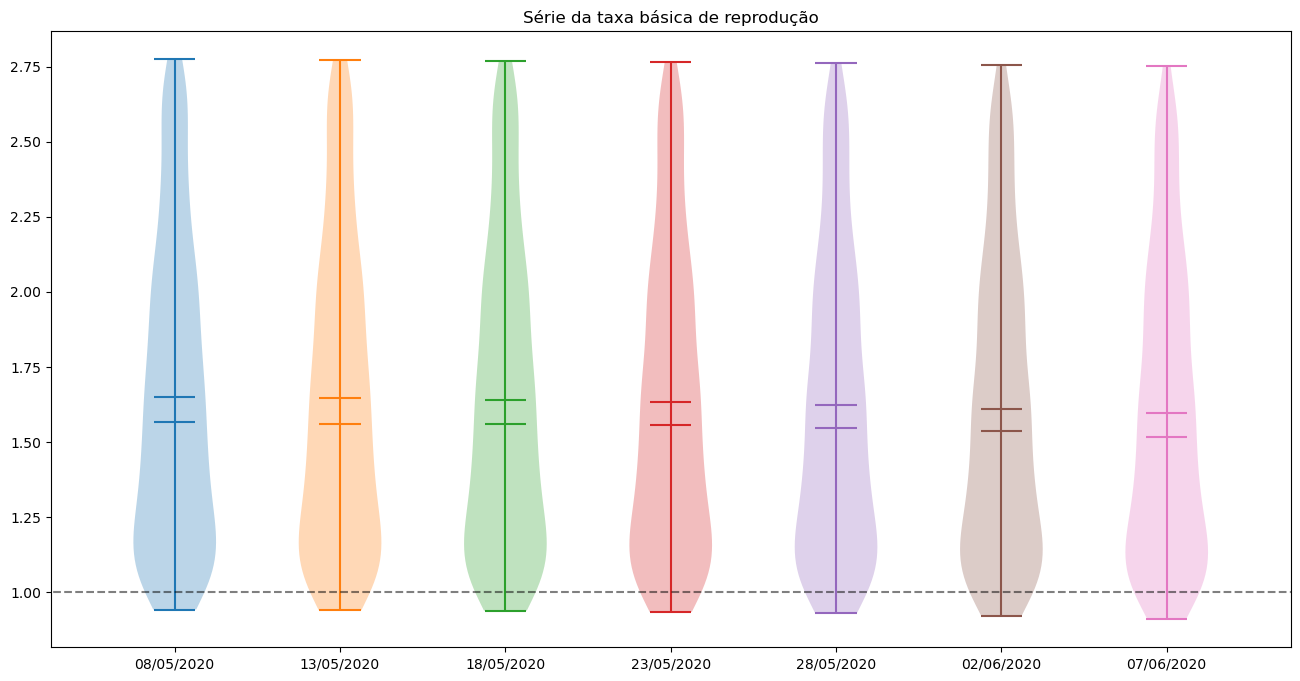

In [432]:
graph_py.graph_rt(xs,ws,ts)

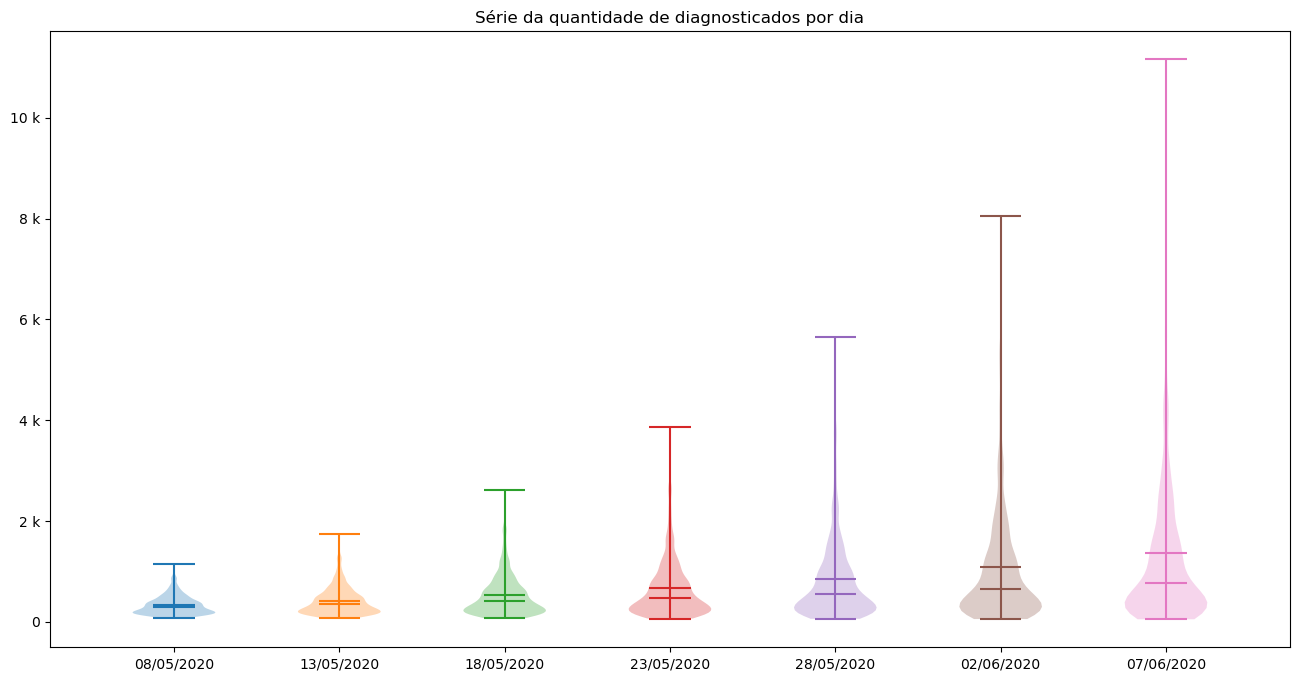

In [433]:
fig, ax = plt.subplots(figsize=(16,8))
ts = 40:5:70
xs,ws = build_series_daily(series, idxs, ts, index = 9)
ax.set_title("Série da quantidade de diagnosticados por dia")
graph_py.graph_series(xs,ws,ts,ax)

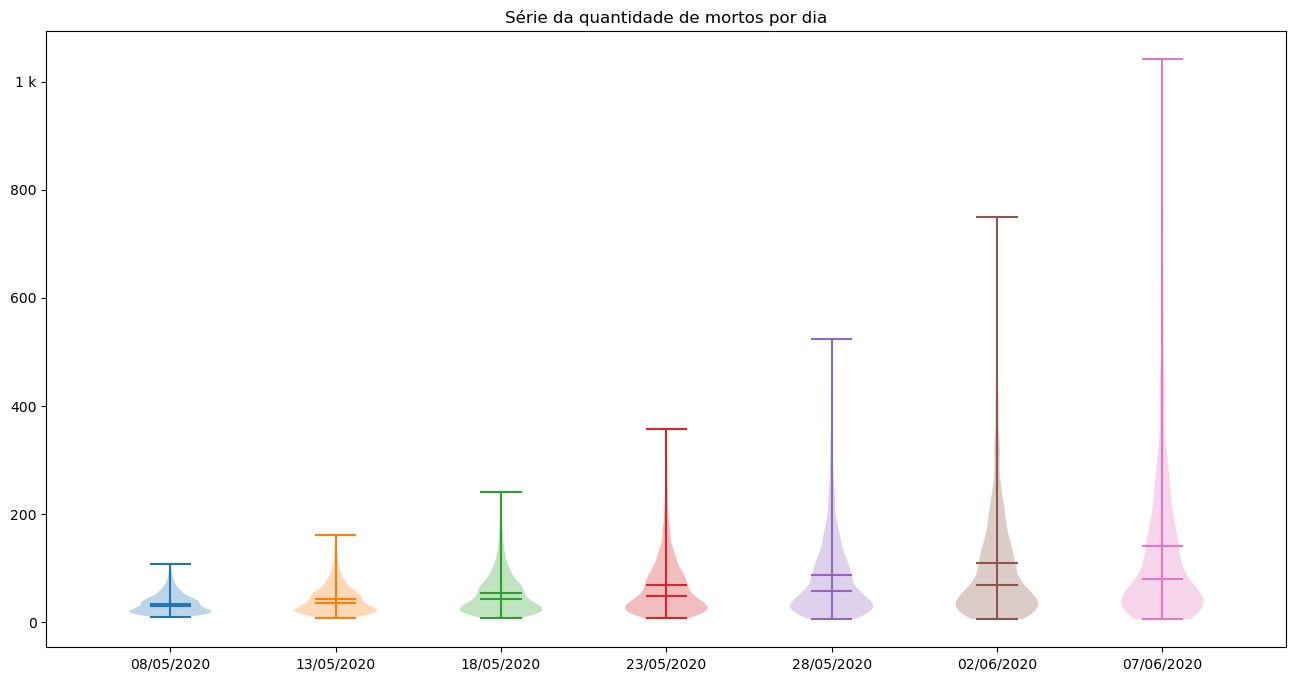

In [434]:
fig, ax = plt.subplots(figsize=(16,8))
ts = 40:5:70
xs,ws = build_series_daily(series, idxs, ts)
ax.set_title("Série da quantidade de mortos por dia")
graph_py.graph_series(xs,ws,ts,ax)

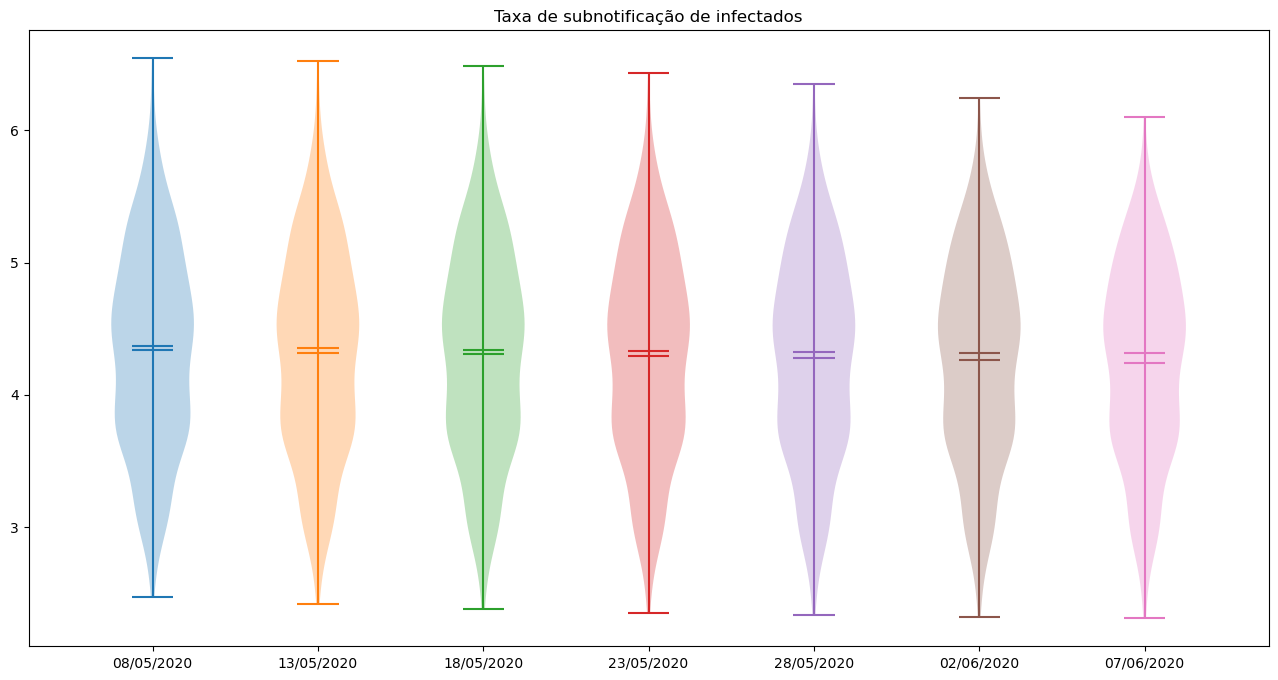

In [435]:
fig, ax = plt.subplots(figsize=(16,8))
ts = 40:5:70
xs,ws = build_series_subnot_infec(series, idxs, ts)
ax.set_title("Taxa de subnotificação de infectados")
graph_py.graph_series(xs,ws,ts,ax)

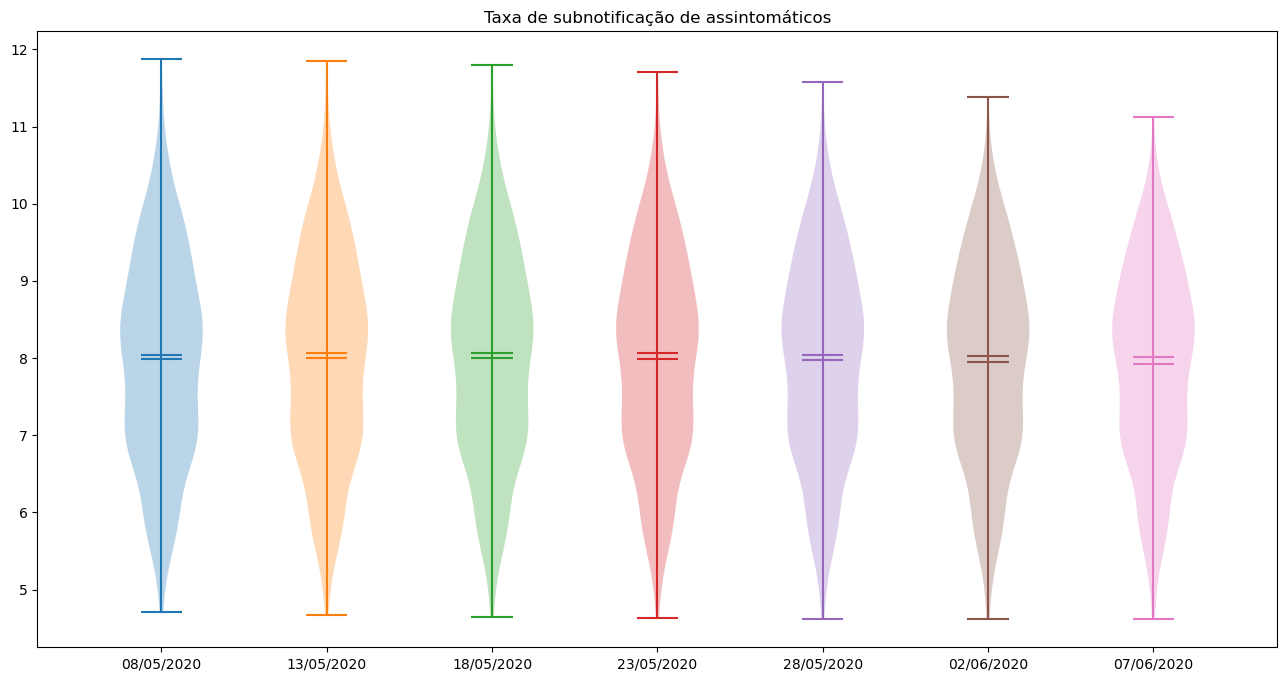

In [436]:
fig, ax = plt.subplots(figsize=(16,8))
ts = 40:5:70
xs,ws = build_series_subnot_assint(series, idxs, ts)
ax.set_title("Taxa de subnotificação de assintomáticos")
graph_py.graph_series(xs,ws,ts,ax)